In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri dosyasını yükleyelim ve ilk beş satırını görelim.
data_path = 'GLT_ByMajorCity.csv'
data = pd.read_csv(data_path)
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [29]:
# dt sütununu datetime türüne dönüştürelim
data['dt'] = pd.to_datetime(data['dt'])
data.dtypes  # Veri türlerini kontrol edelim

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [30]:
def convert_coordinates(coord):
    # Koordinat verisini sayısal değere dönüştürme fonksiyonu.
    # Örnek: "41.23N" -> 41.23, "41.23W" -> -41.23
    
    # Koordinatın sayısal değerini ve yönünü ayır.
    parts = coord[:-1], coord[-1]
    # Sayısal değeri float türüne çevir.
    numeric_value = float(parts[0])
    # Eğer yön batı veya güney ise negatif yap.
    if parts[1] in ['W', 'S']:
        numeric_value *= -1
    return numeric_value

# Latitude ve Longitude sütunlarını dönüştürelim.
data['Latitude'] = data['Latitude'].apply(convert_coordinates)
data['Longitude'] = data['Longitude'].apply(convert_coordinates)

data.head()  # Sonuçları kontrol edelim.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23


In [31]:
# Eksik verileri tespit edelim
missing_data = data.isnull().sum()
missing_data

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [32]:
# Eksik verileri içeren satırları silelim
data_cleaned = data.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Temizlenmiş veri setinin ilk beş satırını ve eksik veri sayısını kontrol edelim
data_cleaned.head(), data_cleaned.isnull().sum()

(          dt  AverageTemperature  AverageTemperatureUncertainty     City  \
 0 1849-01-01              26.704                          1.435  Abidjan   
 1 1849-02-01              27.434                          1.362  Abidjan   
 2 1849-03-01              28.101                          1.612  Abidjan   
 3 1849-04-01              26.140                          1.387  Abidjan   
 4 1849-05-01              25.427                          1.200  Abidjan   
 
          Country  Latitude  Longitude  
 0  Côte D'Ivoire      5.63      -3.23  
 1  Côte D'Ivoire      5.63      -3.23  
 2  Côte D'Ivoire      5.63      -3.23  
 3  Côte D'Ivoire      5.63      -3.23  
 4  Côte D'Ivoire      5.63      -3.23  ,
 dt                               0
 AverageTemperature               0
 AverageTemperatureUncertainty    0
 City                             0
 Country                          0
 Latitude                         0
 Longitude                        0
 dtype: int64)

In [33]:
# Temizlenmiş ve işlenmiş veri setini 'MajorCities.csv' olarak tekrar kaydedelim
cleaned_data_path = 'MajorCities.csv'
data_cleaned.to_csv(cleaned_data_path, index=False)

# Kaydedilen dosyanın yolu
cleaned_data_path


'MajorCities.csv'

In [34]:
# İşlenmiş veri dosyasını yükleyelim ve içeriğine bakalım.
cleaned_data = pd.read_csv('MajorCities.csv')

# İlk beş satırını gösterelim
cleaned_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23


In [35]:
# Veri setindeki tarih sütununu datetime türüne dönüştürmek
cleaned_data['Year'] = pd.to_datetime(cleaned_data['dt']).dt.year

# Her şehir için yıllık maksimum ve minimum sıcaklıkları hesaplayalım.
city_yearly_temps = cleaned_data.groupby(['City', 'Year'])['AverageTemperature'].agg(['max', 'min']).reset_index()
city_yearly_temps['temp_range'] = city_yearly_temps['max'] - city_yearly_temps['min']

# Şimdi her şehir için en büyük sıcaklık aralığına sahip yılları bulalım.
max_temp_ranges = city_yearly_temps.sort_values('temp_range', ascending=False).groupby('City').first().reset_index()

# En büyük sıcaklık aralığına sahip ilk 10 şehri ve yılları seçelim.
top_cities_with_ranges = max_temp_ranges.sort_values('temp_range', ascending=False).head(10)

top_cities_with_ranges

,City,Year,max,min,temp_range
34,Harbin,1922,23.148,-26.772,49.920
19,Changchun,1919,26.572,-20.179,46.751
64,Montreal,1761,26.164,-15.568,41.732
85,Shenyang,1922,23.925,-17.035,40.960
65,Moscow,2010,24.580,-15.846,40.426
48,Kiev,1929,22.543,-16.191,38.734
96,Toronto,1761,25.649,-11.312,36.961
92,Taiyuan,1930,23.833,-13.116,36.949
79,Saint Petersburg,1871,17.592,-18.644,36.236
71,New York,1761,29.141,-6.900,36.041


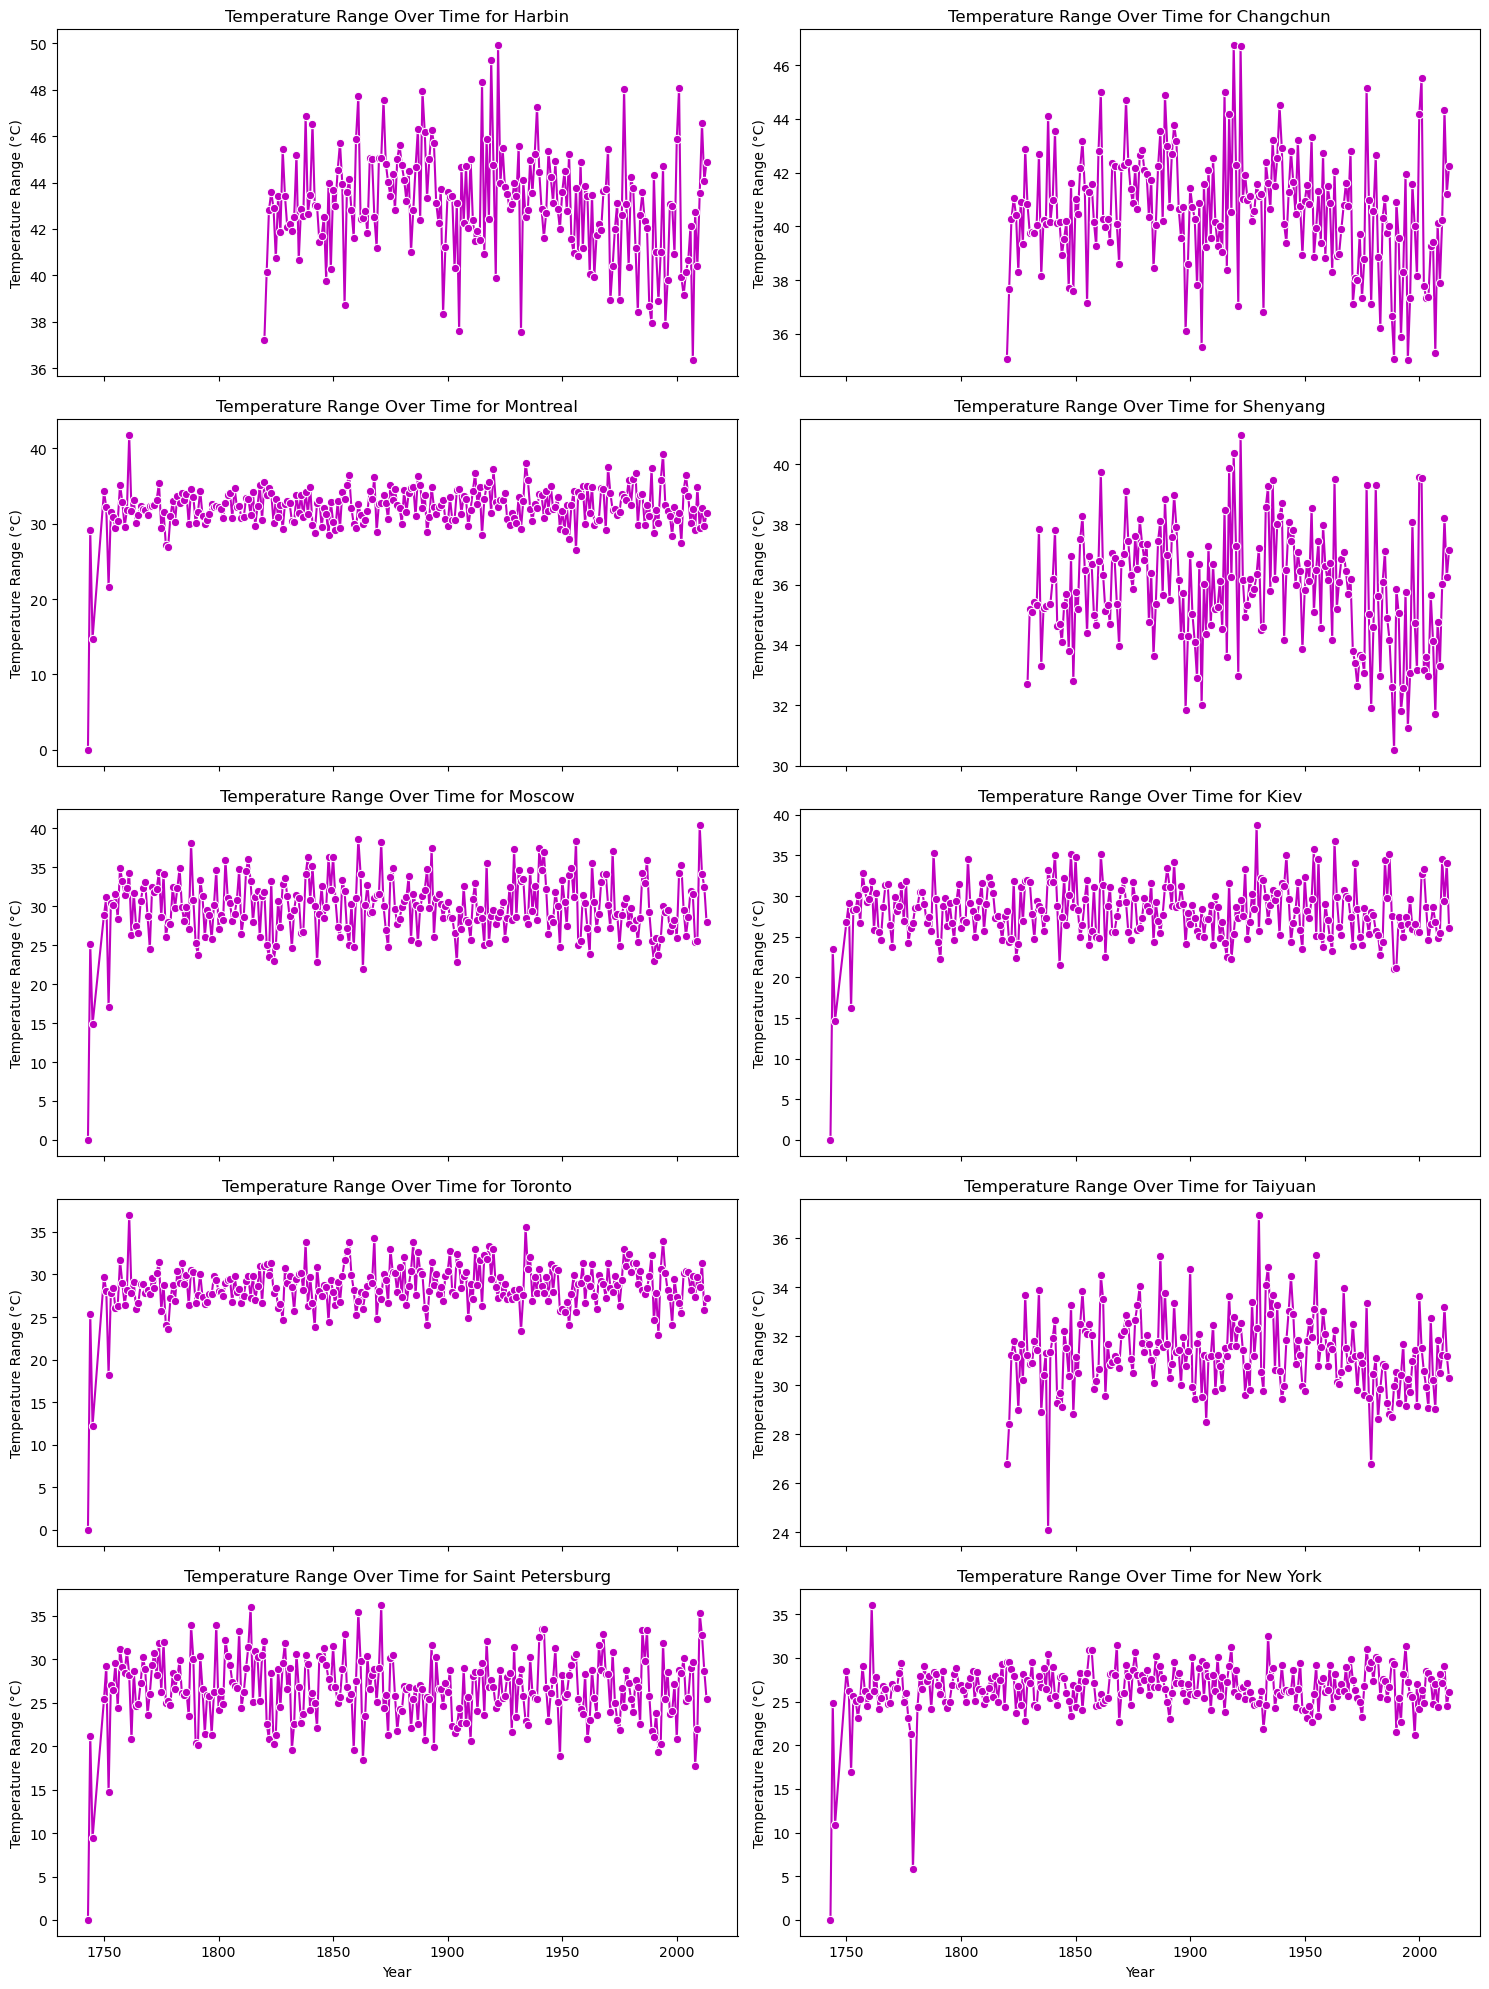

In [36]:
# Grafik üzerinde iyileştirmeler yapmak için, her bir şehrin zaman içindeki sıcaklık aralığını daha net görebilmek adına,
# her bir şehir için ayrı bir grafik çizdirelim.

# Şehir isimlerini ve yıllar arası sıcaklık aralıklarını içeren bir veri seti oluşturalım.
city_data_ranges = city_yearly_temps[city_yearly_temps['City'].isin(top_cities_with_ranges['City'])]

# Şehirleri sıcaklık aralığına göre sıralayalım.
city_data_sorted = city_data_ranges.sort_values(['City', 'Year'])

# Grafikleri çizelim.
fig, axes = plt.subplots(5, 2, figsize=(15, 20), sharex=True)
axes = axes.flatten()  # Eksenleri düz bir liste haline getir.

for i, city in enumerate(top_cities_with_ranges['City']):
    city_data = city_data_sorted[city_data_sorted['City'] == city]
    sns.lineplot(x='Year', y='temp_range', data=city_data, ax=axes[i], color="m", marker="o")
    axes[i].set_title(f'Temperature Range Over Time for {city}')
    axes[i].set_ylabel('Temperature Range (°C)')
    axes[i].set_xlabel('Year')

# Grafikler arasındaki boşlukları ayarlayalım ve gösterelim.
plt.tight_layout()
plt.show()

In [37]:
# En büyük sıcaklık aralıklarına sahip ilk 10 şehir ve bu aralıkların kaydedildiği yılları 1920-1970 arası için tekrar hesaplayalım.

# Önce, 1920 ile 1970 arasındaki verileri seçelim.
city_yearly_temps_period = city_yearly_temps[(city_yearly_temps['Year'] >= 1920) & (city_yearly_temps['Year'] <= 1970)]

# Şimdi bu dönem için her şehirdeki en büyük sıcaklık aralıklarını bulalım.
max_temp_ranges_period = city_yearly_temps_period.sort_values('temp_range', ascending=False).groupby('City').first().reset_index()

# En büyük sıcaklık aralığına sahip ilk 10 şehri ve yılları seçelim.
top_cities_with_ranges_period = max_temp_ranges_period.sort_values('temp_range', ascending=False).head(10)

top_cities_with_ranges_period


,City,Year,max,min,temp_range
34,Harbin,1922,23.148,-26.772,49.920
19,Changchun,1922,23.445,-23.272,46.717
85,Shenyang,1922,23.925,-17.035,40.960
48,Kiev,1929,22.543,-16.191,38.734
65,Moscow,1956,19.467,-18.943,38.410
64,Montreal,1934,20.073,-17.961,38.034
92,Taiyuan,1930,23.833,-13.116,36.949
96,Toronto,1934,20.057,-15.502,35.559
94,Tianjin,1922,27.222,-7.931,35.153
73,Peking,1922,27.222,-7.931,35.153


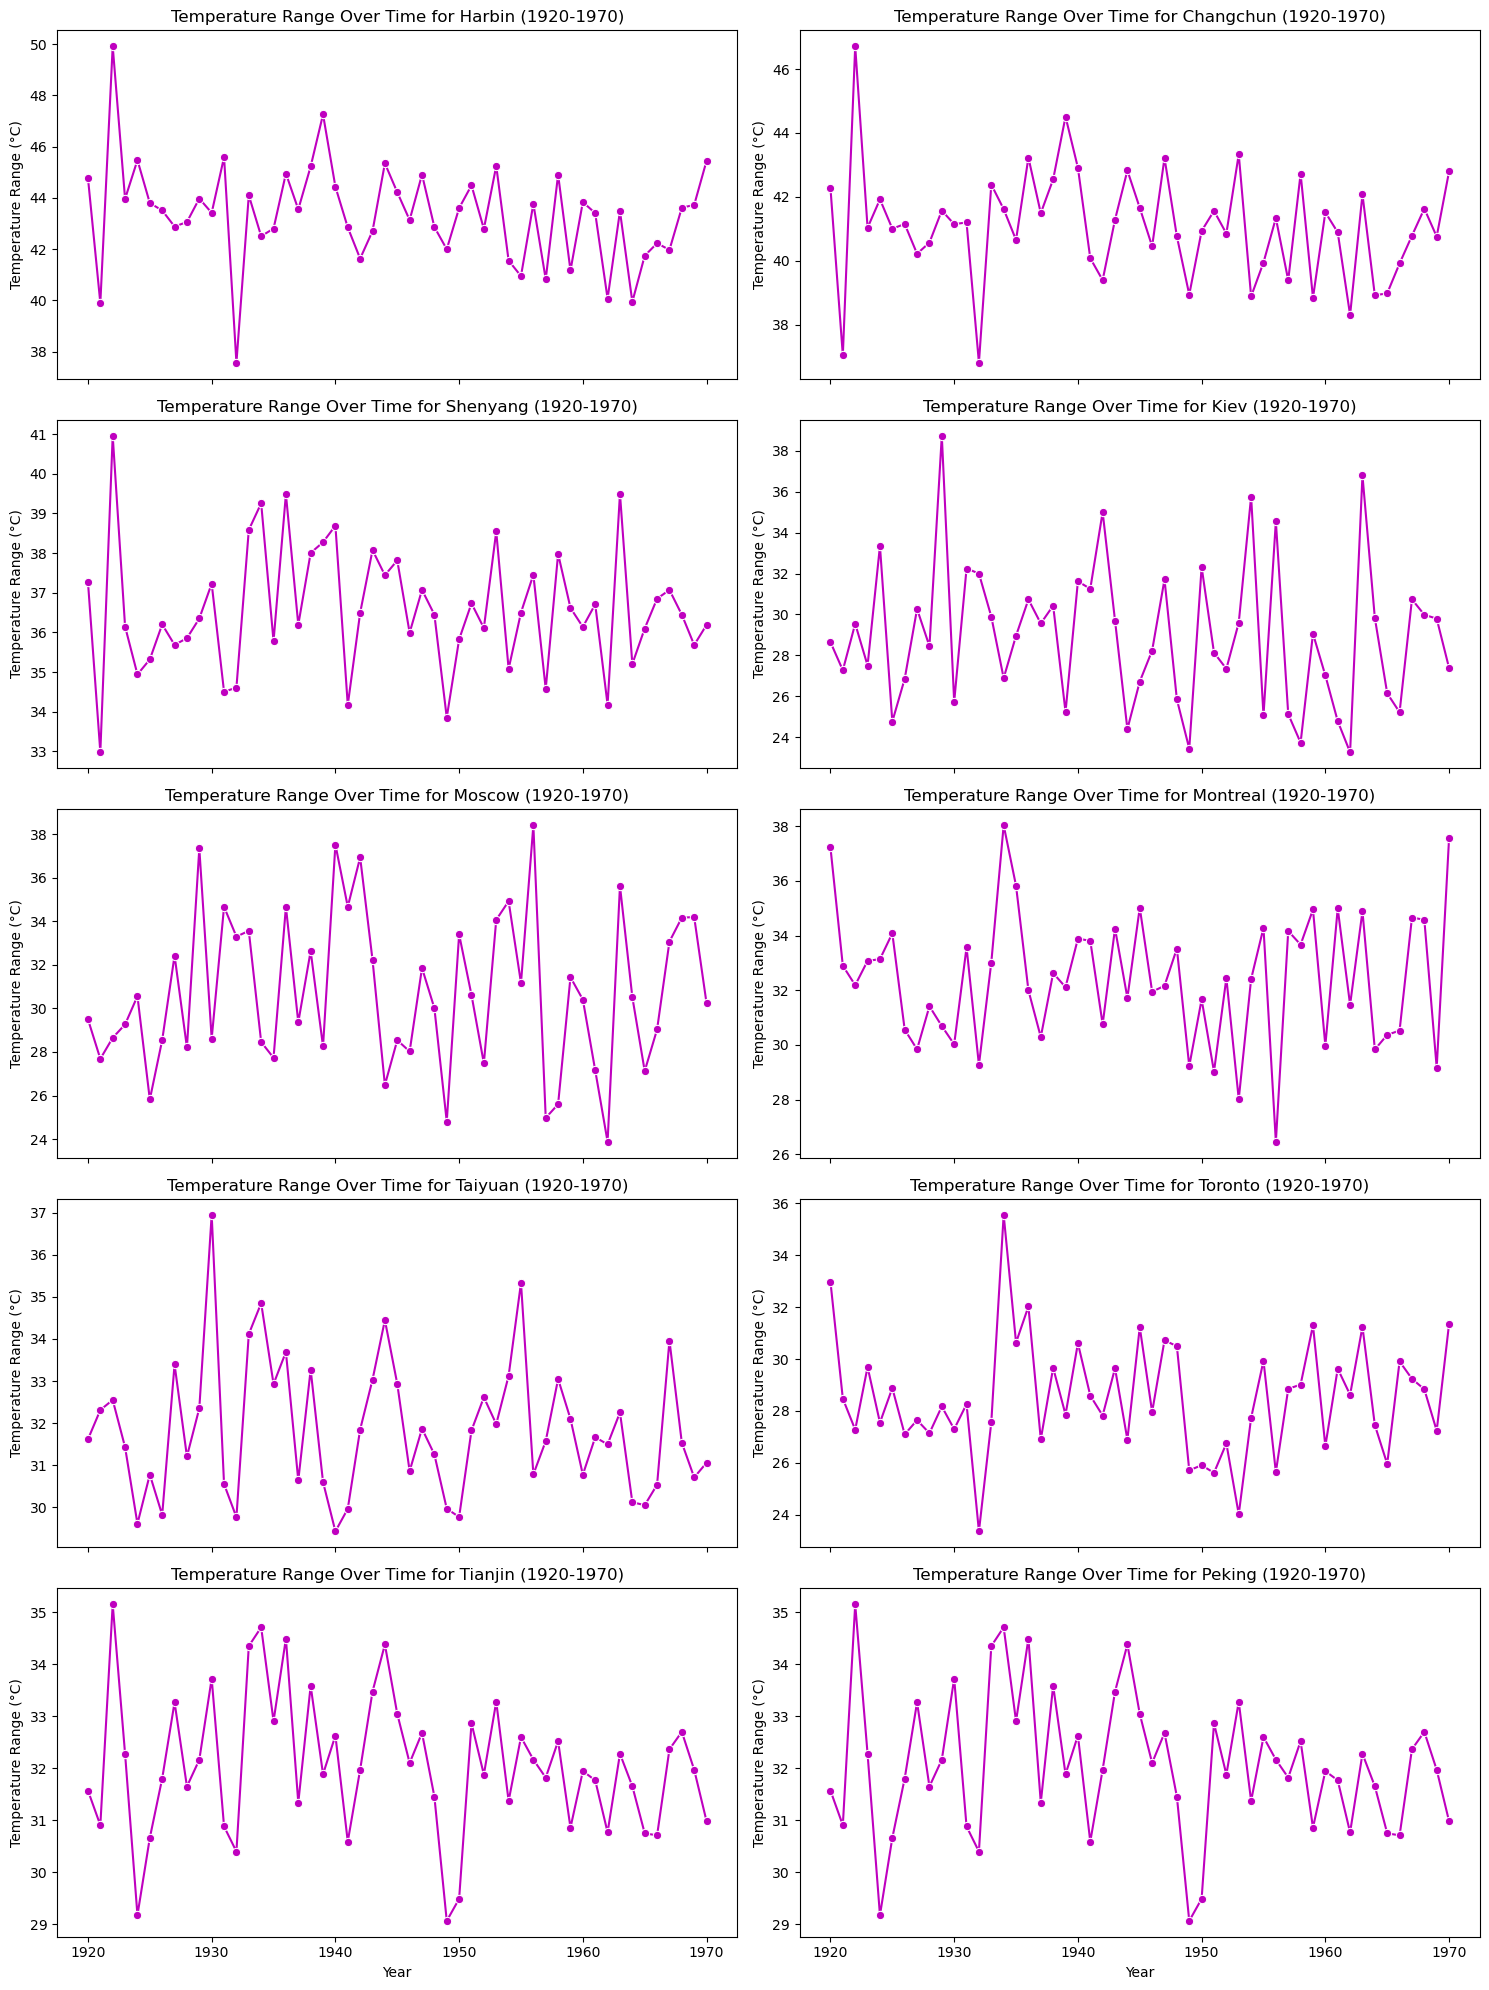

In [38]:
# Şehir isimlerini ve yıllar arası sıcaklık aralıklarını içeren veri seti üzerinden her bir şehir için ayrı bir grafik çizdirelim.
# Bu sefer 1920-1970 yılları arasındaki verileri kullanarak her şehir için ayrı grafik çizdireceğiz.

# Şehirleri sıcaklık aralığına göre sıralayalım.
city_data_sorted_period = city_yearly_temps_period.sort_values(['City', 'Year'])

# Grafikleri çizelim.
fig, axes = plt.subplots(5, 2, figsize=(15, 20), sharex=True)
axes = axes.flatten()  # Eksenleri düz bir liste haline getir.

for i, city in enumerate(top_cities_with_ranges_period['City']):
    city_data = city_data_sorted_period[city_data_sorted_period['City'] == city]
    sns.lineplot(x='Year', y='temp_range', data=city_data, ax=axes[i], color="m", marker="o")
    axes[i].set_title(f'Temperature Range Over Time for {city} (1920-1970)')
    axes[i].set_ylabel('Temperature Range (°C)')
    axes[i].set_xlabel('Year')

# Grafikler arasındaki boşlukları ayarlayalım ve gösterelim.
plt.tight_layout()
plt.show()

/var/folders/2w/njds6fr12r9dlvp34dksry0w0000gn/T/ipykernel_14615/1943802690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


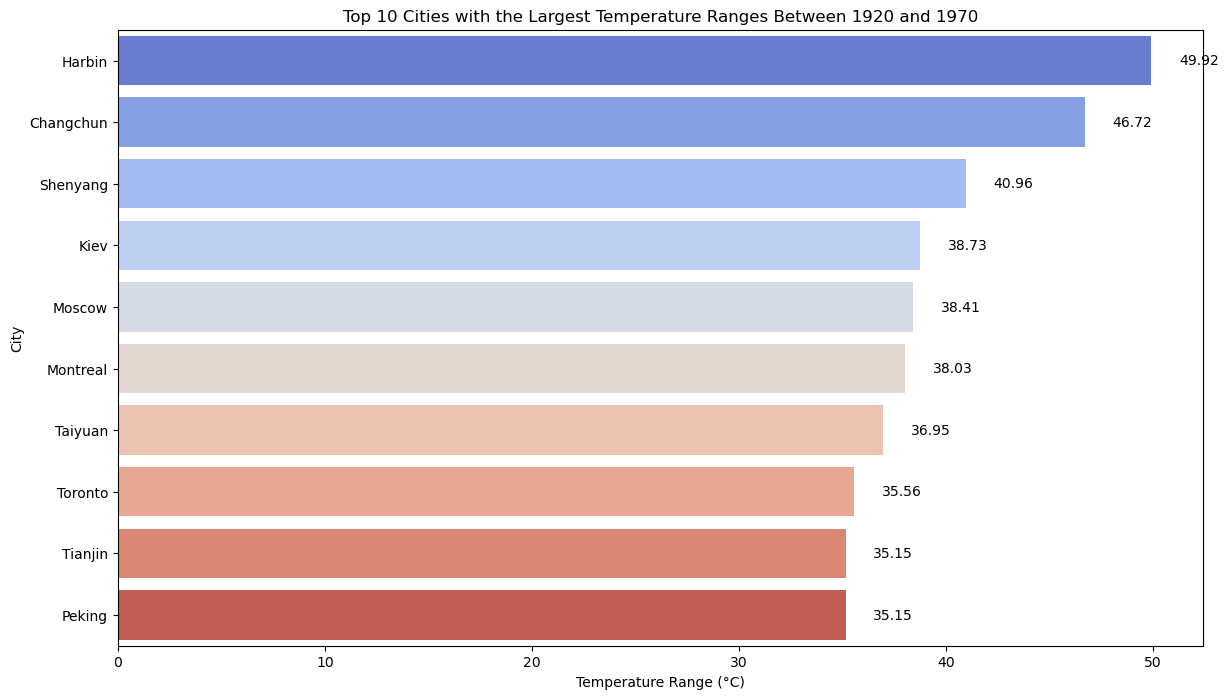

In [39]:
# Tekrar aynı grafik çizimi için kodları kullanıyoruz.

# Grafik çizimi için Seaborn'un barplot fonksiyonunu kullanacağız.
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    x='temp_range',
    y='City',
    data=top_cities_with_ranges_period_sorted,
    palette='coolwarm'
)

# Grafiğin başlığını ve eksen isimlerini ekleyelim.
plt.title('Top 10 Cities with the Largest Temperature Ranges Between 1920 and 1970')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('City')

# Değerlerin grafik üzerinde görünmesi için her bar üzerine yazı ekleyelim.
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'), 
                     (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     ha = 'left', va = 'center', 
                     xytext = (20, 0), 
                     textcoords = 'offset points')

plt.show()